# **Indeed - ML Intern - Muhammad_Talha**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

# **Data Understanding & Exploration**

In [ ]:
def explore_dataset(data, data_filename=None):
    """
    In explore_dataset function we are doing all the things that given below:
    - checking shape of dataset
    - checking column names that exist in dataset
    - checking null values 
    - checking overall information about dataset using info() method
    - checking dtypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nColumns: {}".format(data.columns.tolist()))
    print("\nTotal Null Values: {}".format(data.isnull().sum().sum()))
    print(data.isnull().sum())
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)

In [ ]:
filename = '/content/drive/MyDrive/Assignment Data.csv'
df = pd.read_csv(filename)

In [ ]:
# lets check the information of dataset
explore_dataset(df,filename)

			EDA Dataset: /content/drive/MyDrive/Assignment Data.csv
Total Rows: 129971

Total Columns: 17

Columns: ['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']

Total Null Values: 594665
Unnamed: 0                    0
country                      63
description                   0
designation               37465
points                        0
price                      8996
province                     63
region_1                  21247
region_2                  79460
taster_name               26244
taster_twitter_handle     31213
title                         0
variety                       1
winery                        0
Unnamed: 14              129971
Unnamed: 15              129971
Unnamed: 16              129971
dtype: int64
 
		Overall Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeI

In [ ]:
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,NaN,NaN
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,NaN,NaN,NaN


In [ ]:
df = df[['description', 'variety']]
df.head()

,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling
4,"Much like the regular bottling from 2012, this...",Pinot Noir


# **Data Cleaning & Analysis**

In [ ]:
df.isnull().sum()

description    0
variety        1
dtype: int64

In [ ]:
df[df['variety'].isna()]

,description,variety
86909,"A chalky, dusty mouthfeel nicely balances this...",NaN


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

description    0
variety        0
dtype: int64

In [ ]:
v = df['variety'].value_counts().reset_index()
v

,index,variety
0,Pinot Noir,13272
1,Chardonnay,11753
2,Cabernet Sauvignon,9472
3,Red Blend,8946
4,Bordeaux-style Red Blend,6915
...,...,...
702,Cabernet Sauvignon-Barbera,1
703,Sauvignonasse,1
704,Forcallà,1
705,Meseguera,1


In [ ]:
v[:10]

,index,variety
0,Pinot Noir,13272
1,Chardonnay,11753
2,Cabernet Sauvignon,9472
3,Red Blend,8946
4,Bordeaux-style Red Blend,6915
5,Riesling,5189
6,Sauvignon Blanc,4967
7,Syrah,4142
8,Rosé,3564
9,Merlot,3102


In [ ]:
def matching_category(category):
    matching_c = []
    for idx,i in enumerate(v['index']):
        l = i.lower().split()
        if category.lower() in l:
            print(idx, i)
            matching_c.append(i)
    return matching_c

In [ ]:
print(matching_category('Blend'))

3 Red Blend
4 Bordeaux-style Red Blend
15 White Blend
16 Sparkling Blend
18 Rhône-style Red Blend
20 Champagne Blend
24 Bordeaux-style White Blend
38 Tempranillo Blend
42 Rhône-style White Blend
98 Cabernet Blend
100 Austrian white blend
112 Provence red blend
114 Austrian Red Blend
126 Alsace white blend
154 Provence white blend
214 Touriga Nacional Blend
288 Grenache Blend
435 Madeira Blend
461 Malbec Blend
517 Garnacha Blend
['Red Blend', 'Bordeaux-style Red Blend', 'White Blend', 'Sparkling Blend', 'Rhône-style Red Blend', 'Champagne Blend', 'Bordeaux-style White Blend', 'Tempranillo Blend', 'Rhône-style White Blend', 'Cabernet Blend', 'Austrian white blend', 'Provence red blend', 'Austrian Red Blend', 'Alsace white blend', 'Provence white blend', 'Touriga Nacional Blend', 'Grenache Blend', 'Madeira Blend', 'Malbec Blend', 'Garnacha Blend']


In [ ]:
print(matching_category('Pinot'))

0 Pinot Noir
19 Pinot Gris
25 Pinot Grigio
41 Pinot Blanc
63 Pinot Nero
71 Pinot Bianco
133 Pinot Meunier
224 Pinot Noir-Gamay
263 Pinot Auxerrois
405 Pinot Blanc-Chardonnay
467 Pinot Noir-Syrah
580 Pinot Grigio-Sauvignon Blanc
617 Tokay Pinot Gris
643 Pinot Gris-Gewürztraminer
648 Pinot Blanc-Pinot Noir
690 Pinot Blanc-Viognier
['Pinot Noir', 'Pinot Gris', 'Pinot Grigio', 'Pinot Blanc', 'Pinot Nero', 'Pinot Bianco', 'Pinot Meunier', 'Pinot Noir-Gamay', 'Pinot Auxerrois', 'Pinot Blanc-Chardonnay', 'Pinot Noir-Syrah', 'Pinot Grigio-Sauvignon Blanc', 'Tokay Pinot Gris', 'Pinot Gris-Gewürztraminer', 'Pinot Blanc-Pinot Noir', 'Pinot Blanc-Viognier']


In [ ]:
ll = []
for i in v['index']:
    r = matching_category(i.lower())
    ll.append(r)

1 Chardonnay
503 Chardonnay Weissburgunder
5 Riesling
259 White Riesling
297 Johannisberg Riesling
7 Syrah
8 Rosé
243 Portuguese Rosé
9 Merlot
207 Cabernet Merlot
10 Nebbiolo
11 Zinfandel
12 Sangiovese
31 Sangiovese Grosso
414 Sangiovese Cabernet
13 Malbec
461 Malbec Blend
17 Tempranillo
38 Tempranillo Blend
301 Tempranillo Blanco
26 Gamay
195 Gamay Noir
27 Gewürztraminer
28 Viognier
29 Shiraz
32 Barbera
33 Glera
34 Port
540 White Port
35 Grenache
80 Grenache Blanc
288 Grenache Blend
439 Grenache Noir
505 Cabernet Sauvignon Grenache
615 Grenache Gris
39 Carmenère
40 Albariño
44 Aglianico
45 Moscato
239 Moscato Giallo
520 Moscato Rosa
600 Moscato di Noto
46 Garnacha
147 Garnacha Blanca
316 Garnacha Tintorera
517 Garnacha Blend
2 Cabernet Sauvignon
6 Sauvignon Blanc
47 Sauvignon
108 Sauvignon Blanc-Semillon
116 Malbec-Cabernet Sauvignon
123 Tempranillo-Cabernet Sauvignon
141 Shiraz-Cabernet Sauvignon
148 Syrah-Cabernet Sauvignon
157 Merlot-Cabernet Sauvignon
177 Touriga Nacional-Cabernet

In [ ]:
ll

[[],
 ['Chardonnay', 'Chardonnay Weissburgunder'],
 [],
 [],
 [],
 ['Riesling', 'White Riesling', 'Johannisberg Riesling'],
 [],
 ['Syrah'],
 ['Rosé', 'Portuguese Rosé'],
 ['Merlot', 'Cabernet Merlot'],
 ['Nebbiolo'],
 ['Zinfandel'],
 ['Sangiovese', 'Sangiovese Grosso', 'Sangiovese Cabernet'],
 ['Malbec', 'Malbec Blend'],
 [],
 [],
 [],
 ['Tempranillo', 'Tempranillo Blend', 'Tempranillo Blanco'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Gamay', 'Gamay Noir'],
 ['Gewürztraminer'],
 ['Viognier'],
 ['Shiraz'],
 [],
 [],
 ['Barbera'],
 ['Glera'],
 ['Port', 'White Port'],
 ['Grenache',
  'Grenache Blanc',
  'Grenache Blend',
  'Grenache Noir',
  'Cabernet Sauvignon Grenache',
  'Grenache Gris'],
 [],
 [],
 [],
 ['Carmenère'],
 ['Albariño'],
 [],
 [],
 [],
 ['Aglianico'],
 ['Moscato', 'Moscato Giallo', 'Moscato Rosa', 'Moscato di Noto'],
 ['Garnacha', 'Garnacha Blanca', 'Garnacha Tintorera', 'Garnacha Blend'],
 ['Cabernet Sauvignon',
  'Sauvignon Blanc',
  'Sauvignon',
  'Sauvignon Blanc-S

In [ ]:
others = []
for i in ll:
    if len(i)==1:
        for j in i:
            others.append(j)

In [ ]:
others

['Syrah',
 'Nebbiolo',
 'Zinfandel',
 'Gewürztraminer',
 'Viognier',
 'Shiraz',
 'Barbera',
 'Glera',
 'Carmenère',
 'Albariño',
 'Aglianico',
 'Verdejo',
 'Melon',
 'Garganega',
 'Meritage',
 'Torrontés',
 'Prosecco',
 'Blaufränkisch',
 'Mourvèdre',
 'Primitivo',
 'Montepulciano',
 'Zweigelt',
 'G-S-M',
 'Dolcetto',
 'Tannat',
 'Mencía',
 'Roussanne',
 'Verdicchio',
 'Turbiana',
 'Fiano',
 'Monastrell',
 'Vernaccia',
 'Pinotage',
 'Alvarinho',
 'Grillo',
 'Sémillon',
 'Viura',
 'Bonarda',
 'Sagrantino',
 'Rosato',
 'Sherry',
 'Malbec-Merlot',
 'Falanghina',
 'Arneis',
 'Godello',
 'Negroamaro',
 'Lagrein',
 'Arinto',
 'Rosado',
 'Carignan',
 'Cortese',
 'Spätburgunder',
 'Marsanne',
 'Verdelho',
 'Agiorgitiko',
 'Syrah-Grenache',
 'Furmint',
 'Pecorino',
 'Sylvaner',
 'Grenache-Syrah',
 'Müller-Thurgau',
 'Assyrtico',
 'Graciano',
 'Cinsault',
 'Frappato',
 'Silvaner',
 'Encruzado',
 'Shiraz-Viognier',
 'Saperavi',
 'Carricante',
 'Moschofilero',
 'Lemberger',
 'Chardonnay-Viognier',


# **Combining the sub varities into main variety**

In [ ]:
df['variety'] = df['variety'].replace(others, 'Others')
df['variety'] = df['variety'].replace(['Chardonnay', 'Chardonnay Weissburgunder',
                                      'Chardonnay-Sauvignon', 'Chardonnay-Sauvignon Blanc'], 'Chardonnay')
df['variety'] = df['variety'].replace(['Rosé', 'Portuguese Rosé'], 'Rose')
df['variety'] = df['variety'].replace(['Merlot', 'Cabernet Merlot', 
                                      'Merlot-Cabernet Sauvignon', 'Merlot-Cabernet Franc', 'Merlot-Cabernet'], 'Merlot')
df['variety'] = df['variety'].replace(['Sangiovese', 'Sangiovese Grosso', 'Sangiovese Cabernet'], 'Sangiovese')
df['variety'] = df['variety'].replace(['Malbec', 'Malbec Blend'], 'Malbec')
df['variety'] = df['variety'].replace(['Tempranillo', 'Tempranillo Blend', 'Tempranillo Blanco'], 'Tempranillo')
df['variety'] = df['variety'].replace(['Gamay', 'Gamay Noir'], 'Gamay')
df['variety'] = df['variety'].replace(['Port', 'White Port'], 'Port')

df['variety'] = df['variety'].replace(['Grenache',
  'Grenache Blanc',
  'Grenache Blend',
  'Grenache Noir',
  'Cabernet Sauvignon Grenache',
  'Grenache Gris'], 'Grenache')
df['variety'] = df['variety'].replace(['Moscato', 'Moscato Giallo', 'Moscato Rosa', 'Moscato di Noto'], 'Moscato')
df['variety'] = df['variety'].replace(['Garnacha', 'Garnacha Blanca', 'Garnacha Tintorera', 'Garnacha Blend'], 'Garnacha')

df['variety'] = df['variety'].replace(['Cabernet Sauvignon',
  'Sauvignon Blanc',
  'Sauvignon',
  'Sauvignon Blanc-Semillon',
  'Malbec-Cabernet Sauvignon',
  'Tempranillo-Cabernet Sauvignon',
  'Shiraz-Cabernet Sauvignon',
  'Syrah-Cabernet Sauvignon',
  'Merlot-Cabernet Sauvignon',
  'Touriga Nacional-Cabernet Sauvignon',
  'Cabernet Franc-Cabernet Sauvignon',
  'Sauvignon Gris',
  'Carmenère-Cabernet Sauvignon',
  'Sauvignon Blanc-Chardonnay',
  'Sangiovese-Cabernet Sauvignon',
  'Sauvignon Blanc-Verdejo',
  'Sauvignon Blanc-Chenin Blanc',
  'Cabernet Sauvignon Grenache',
  'Sauvignon Blanc-Assyrtiko',
  'Sauvignon Musqué',
  'Sauvignon Blanc-Sauvignon Gris',
  'Bobal-Cabernet Sauvignon'], 'Sauvignon')
df['variety'] = df['variety'].replace(['Vermentino', 'Vermentino Nero'], 'Vermentino')
df['variety'] = df['variety'].replace(['Muscat',
  'Muscat Canelli',
  'Orange Muscat',
  'Muscat Blanc',
  'Black Muscat',
  'Muscat Hamburg',
  'Muscat Blanc à Petits Grains',
  'Muscat of Alexandria',
  "Muscat d'Alexandrie",
  'Valvin Muscat'], 'Muscat')
df['variety'] = df['variety'].replace(['Friulano', 'Tocai Friulano', 'Verduzzo Friulano '], 'Friulano')
df['variety'] = df['variety'].replace(['Greco', 'Greco Bianco'], 'Greco')
df['variety'] = df['variety'].replace(['Moscatel', 'Moscatel Roxo', 'Moscatel de Alejandría', 'Moscatel Graúdo'], 'Moscatel')
df['variety'] = df['variety'].replace(['Trebbiano', 'Trebbiano Spoletino', 'Trebbiano di Lugana'], 'Trebbiano')
df['variety'] = df['variety'].replace(['Lambrusco',
  'Lambrusco di Sorbara',
  'Lambrusco Grasparossa',
  'Lambrusco Salamino'], 'Lambrusco')


df['variety'] = df['variety'].replace(['Weissburgunder', 'Chardonnay Weissburgunder'], 'Weissburgunder')
df['variety'] = df['variety'].replace(['Malvasia',
  'Malvasia Bianca',
  'Malvasia Istriana',
  'Malvasia Nera',
  'Malvasia Fina',
  'Malvasia di Candia'], 'Malvasia')
df['variety'] = df['variety'].replace(['Traminer', 'Roter Traminer', 'Gelber Traminer'], 'Traminer')
df['variety'] = df['variety'].replace(['Teroldego', 'Teroldego Rotaliano'], 'Teroldego')
df['variety'] = df['variety'].replace(['Tannat-Cabernet', 'Tannat-Cabernet Franc'], 'Tannat-Cabernet')

df['variety'] = df['variety'].replace(['Auxerrois', 'Pinot Auxerrois'], 'Auxerrois')
df['variety'] = df['variety'].replace(['Syrah-Cabernet Sauvignon', 'Syrah-Cabernet', 'Syrah-Cabernet Franc'], 'Syrah-Cabernet')
df['variety'] = df['variety'].replace(['Cabernet Sauvignon',
  'Cabernet Franc',
  'Cabernet Sauvignon-Merlot',
  'Cabernet Sauvignon-Syrah',
  'Cabernet Blend',
  'Cabernet Sauvignon-Carmenère',
  'Cabernet Sauvignon-Shiraz',
  'Cabernet Merlot',
  'Cabernet Sauvignon-Cabernet Franc',
  'Cabernet Franc-Merlot',
  'Cabernet Sauvignon-Malbec',
  'Cabernet Franc-Cabernet Sauvignon',
  'Cabernet Sauvignon-Tempranillo',
  'Cabernet',
  'Cabernet Sauvignon-Sangiovese',
  'Cabernet Franc-Malbec',
  'Sangiovese Cabernet',
  'Cabernet Sauvignon-Merlot-Shiraz',
  'Cabernet Franc-Lemberger',
  'Cabernet Sauvignon Grenache',
  'Cabernet Pfeffer',
  'Cabernet Franc-Carmenère',
  'Cabernet Moravia',
  'Cabernet Sauvignon-Barbera',
  'Malbec-Cabernet Sauvignon', 'Malbec-Cabernet Franc', 'Malbec-Cabernet',
  'Shiraz-Cabernet Sauvignon', 'Shiraz-Cabernet'], 'MixCabernet')
df['variety'] = df['variety'].replace(['Vidal Blanc', 'Vidal'], 'Vidal')

df['variety'] = df['variety'].replace(['Tocai Friulano', 'Tocai'], 'Tocai')
df['variety'] = df['variety'].replace(['Pallagrello', 'Pallagrello Nero', 'Pallagrello Bianco'], 'Pallagrello')
df['variety'] = df['variety'].replace(['Manzoni', 'Incrocio Manzoni'], 'Manzoni')
df['variety'] = df['variety'].replace(['Tokay', 'Tokay Pinot Gris'], 'Tokay')
df['variety'] = df['variety'].replace(['Verduzzo', 'Verduzzo Friulano '], 'Verduzzo')
df['variety'] = df['variety'].replace(['Trousseau', 'Trousseau Gris'], 'Trousseau')
df['variety'] = df['variety'].replace(['Gelber Muskateller', 'Muskateller'], 'Muskateller')

df['variety'] = df['variety'].replace(['Alicante Bouschet', 'Alicante'], 'Alicante')
df['variety'] = df['variety'].replace(['Muskat Ottonel', 'Muskat', 'Morio Muskat'], 'Muskat')
df['variety'] = df['variety'].replace(['Grüner Veltliner', 'Roter Veltliner', 'Veltliner'], 'Veltliner')
df['variety'] = df['variety'].replace(['Touriga Nacional',
  'Touriga Nacional-Cabernet Sauvignon',
  'Touriga Nacional Blend',
  'Touriga Franca',
  'Touriga'], 'Touriga')
df['variety'] = df['variety'].replace(['Feteasca Neagra', 'Feteasca'], 'Feteasca')
df['variety'] = df['variety'].replace(['Yapincak', 'Kinali Yapincak'], 'Yapincak')
df['variety'] = df['variety'].replace(["Cesanese d'Affile", 'Cesanese'], 'Cesanese')

df['variety'] = df['variety'].replace(['Corvina, Rondinella, Molinara', 'Molinara'], 'Molinara')

df['variety'] = df['variety'].replace(['Red Blend',
 'Bordeaux-style Red Blend',
 'White Blend',
 'Sparkling Blend',
 'Rhône-style Red Blend',
 'Champagne Blend',
 'Bordeaux-style White Blend',
 'Tempranillo Blend',
 'Rhône-style White Blend',
 'Cabernet Blend',
 'Austrian white blend',
 'Provence red blend',
 'Austrian Red Blend',
 'Alsace white blend',
 'Provence white blend',
 'Touriga Nacional Blend',
 'Grenache Blend',
 'Madeira Blend',
 'Malbec Blend',
 'Garnacha Blend'], 'Blend')
df['variety'] = df['variety'].replace(['Pinot Noir',
 'Pinot Gris',
 'Pinot Grigio',
 'Pinot Blanc',
 'Pinot Nero',
 'Pinot Bianco',
 'Pinot Meunier',
 'Pinot Noir-Gamay',
 'Pinot Auxerrois',
 'Pinot Blanc-Chardonnay',
 'Pinot Noir-Syrah',
 'Pinot Grigio-Sauvignon Blanc',
 'Tokay Pinot Gris',
 'Pinot Gris-Gewürztraminer',
 'Pinot Blanc-Pinot Noir',
 'Pinot Blanc-Viognier'], 'Pinot')

In [ ]:
df['variety'].value_counts()[:50]

Blend                       25028
Others                      24969
Pinot                       16630
Sauvignon                   15102
Chardonnay                  11767
Riesling                     5189
Rose                         3580
Sangiovese                   3462
Merlot                       3192
Malbec                       2655
Portuguese Red               2466
Tempranillo                  2407
MixCabernet                  1848
Veltliner                    1362
Portuguese White             1159
Gamay                        1048
Grenache                      798
Petite Sirah                  770
Port                          670
Molinara                      620
Chenin Blanc                  591
Moscato                       377
Garnacha                      374
Nero d'Avola                  365
Petit Verdot                  269
Vermentino                    233
Touriga                       229
Muscat                        225
Tinta de Toro                 166
Friulano      

In [ ]:
var = df['variety'].value_counts().reset_index()
var_list = var[var['variety']<2000]['index'].tolist()
print(var_list)

['MixCabernet', 'Veltliner', 'Portuguese White', 'Gamay', 'Grenache', 'Petite Sirah', 'Port', 'Molinara', 'Chenin Blanc', 'Moscato', 'Garnacha', "Nero d'Avola", 'Petit Verdot', 'Vermentino', 'Touriga', 'Muscat', 'Tinta de Toro', 'Friulano', 'Greco', 'Nerello Mascalese', 'Tinto Fino', 'St. Laurent', 'Lambrusco', 'Ribolla Gialla', 'Malvasia', 'Fumé Blanc', 'Moscatel', 'Vidal', 'Portuguese Sparkling', 'Trebbiano', 'Petit Manseng', 'Alicante', 'Semillon-Sauvignon Blanc', 'Gros and Petit Manseng', 'Weissburgunder', 'Tannat-Cabernet', 'Traminer', 'Prugnolo Gentile', 'Muskateller', 'Pedro Ximénez', 'Auxerrois', 'Fernão Pires', 'Teroldego', 'Chenin Blanc-Chardonnay', 'Petite Verdot', 'Muskat', 'Gros Manseng', 'Syrah-Cabernet', 'Pallagrello', 'Nero di Troia', 'Colombard-Sauvignon Blanc', 'Tinto del Pais', 'Coda di Volpe', 'Plavac Mali', 'Hondarrabi Zuri', 'Antão Vaz', 'Syrah-Petite Sirah', 'Baco Noir', 'Seyval Blanc', 'Prieto Picudo', 'Kalecik Karasi', 'Pansa Blanca', 'Uva di Troia', 'Chenin Bl

In [ ]:
df['variety'] = df['variety'].replace(var_list, 'Others')

# **Data Visualization**

In [ ]:
def categroy_distribution(data, col, top=None):
    print("\t\t{} Distribution".format(col))
    print()
    perc = round(data[col].value_counts(normalize=True)[:top]*100,2)

    dataCat = perc.to_frame().reset_index().rename(columns={'index':'Category',
                                                          col:f'{col}Percentage %'})
    print(tabulate(dataCat, headers = 'keys', tablefmt = 'psql'))
    plt.figure(figsize=(7,7))
    fig = sns.countplot(x=col, data=data, color="g", order=data[col].value_counts().iloc[:top].index)
    for p in fig.patches:
        fig.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+10), size=12)
    plt.xticks(rotation=90)
    plt.show()

		variety Distribution

+----+----------------+-----------------------+
|    | Category       |   varietyPercentage % |
|----+----------------+-----------------------|
|  0 | Others         |                 29.62 |
|  1 | Blend          |                 19.26 |
|  2 | Pinot          |                 12.8  |
|  3 | Sauvignon      |                 11.62 |
|  4 | Chardonnay     |                  9.05 |
|  5 | Riesling       |                  3.99 |
|  6 | Rose           |                  2.75 |
|  7 | Sangiovese     |                  2.66 |
|  8 | Merlot         |                  2.46 |
|  9 | Malbec         |                  2.04 |
| 10 | Portuguese Red |                  1.9  |
| 11 | Tempranillo    |                  1.85 |
+----+----------------+-----------------------+


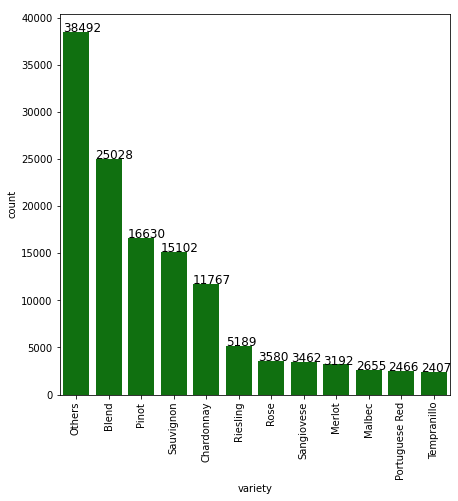

In [ ]:
categroy_distribution(df, 'variety')

		Distribution of Labels


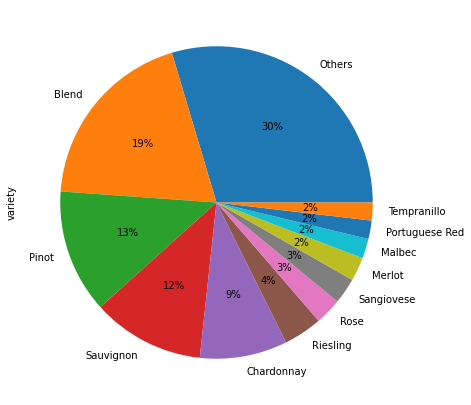

In [ ]:
print("\t\tDistribution of Labels")
plt.figure(figsize=(7,8))
df['variety'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [ ]:
# lets try to check the length of each text of training dataset
df['description_len'] = df['description'].str.len()

In [ ]:
df.head()

,description,variety,description_len
0,"Aromas include tropical fruit, broom, brimston...",Blend,172
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red,227
2,"Tart and snappy, the flavors of lime flesh and...",Pinot,186
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling,199
4,"Much like the regular bottling from 2012, this...",Pinot,249


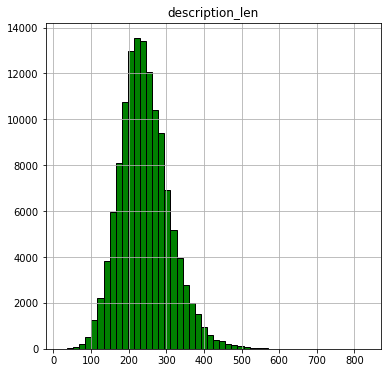

In [ ]:
def plot_histogram(data):
    # Overall idea about distribution of data histogram 
    data.select_dtypes(include=[int, float]).hist(bins=50, figsize=(6,6), color = "g", edgecolor='black')
    plt.show()
    
plot_histogram(df)

# **Data Preprocessing**

In [ ]:
# importing the NLP libraries that will be used for preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer, PorterStemmer

stemmer = PorterStemmer() #creating an instance of the class

stopwords.words("english")[:10] # <-- import the english stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def preprocess_text(text):
    """In preprocess_text function we will apply all the things that given below:
    - removing links
    - removing special characters
    - removing punctuations
    - removing numbers
    - removing stopwords
    - doing stemming
    - transforming in lowercase
    - removing excessive whitespaces
    """
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove punctuations in string
    text = re.sub(r'[^\w\s]', "", text) 
    
    # remove stopwords, doing stemming
    # 1. tokenize
    tokens = nltk.word_tokenize(text)
    # 2. check if stopword and stemming the word
    tokens = [stemmer.stem(w) for w in tokens if not w.lower() in stopwords.words("english") if len(w)>=3]
    # 3. join back together
    text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [ ]:
# lets get the clean text of training dataset
df['cleaned_description'] = df['description'].apply(lambda x: preprocess_text(x))

In [ ]:
# creating a dictionary
dic = {'Others':0,'Blend':1,'Pinot':2,'Sauvignon':3,'Chardonnay':4,'Riesling':5,'Rose':6,
       'Sangiovese':7,'Merlot':8,'Malbec':9,'Portuguese Red':10,'Tempranillo':11}
df['variety_label'] = df['variety'].map(dic)

In [ ]:
df.head()

,description,variety,description_len,cleaned_description,variety_label
0,"Aromas include tropical fruit, broom, brimston...",Blend,172,aroma includ tropic fruit broom brimston dri h...,1
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red,227,ripe fruiti wine smooth still structur firm ta...,10
2,"Tart and snappy, the flavors of lime flesh and...",Pinot,186,tart snappi flavor lime flesh rind domin green...,2
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling,199,pineappl rind lemon pith orang blossom start a...,5
4,"Much like the regular bottling from 2012, this...",Pinot,249,much like regular bottl come across rather rou...,2


In [ ]:
# define a function for getting all words from the text
def returning_tokinize_list(df,column_name):
    df = df.reset_index(drop=True)  
    tokenize_list = [word_tokenize(df[column_name][i]) for i in range(df.shape[0])]
    final = [j for i in tokenize_list for j in i]
    return final     

In [ ]:
# get the all words of text into list
tokenize_list_words= returning_tokinize_list(df, 'cleaned_description')

In [ ]:
# function for words in dataframe format
def table_format(data_list,column_name):
    df_ = pd.DataFrame(data_list, columns = [column_name,'Frequency_distribution'])
    return tabulate(df_, headers = 'keys', tablefmt = 'psql')

# function for extracting the most common words in reviews text
def most_common_words(cleaned_col_name_list,common_words = 10):
    fdist = FreqDist(cleaned_col_name_list)
    most_common=fdist.most_common(common_words)
    return most_common

# draw a graph of word which are most common
def word_cloud(data):
    unique_string=(" ").join(data)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("wordCloud"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

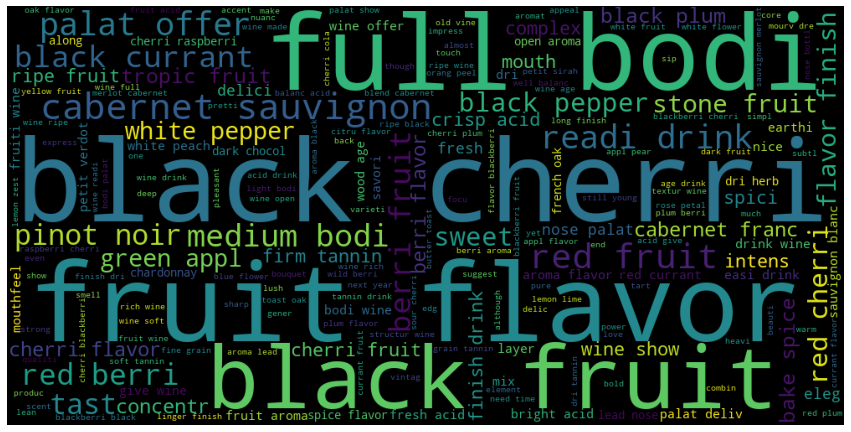

+----+--------+--------------------------+
|    | word   |   Frequency_distribution |
|----+--------+--------------------------|
|  0 | wine   |                    83105 |
|  1 | flavor |                    70969 |
|  2 | fruit  |                    63934 |
|  3 | aroma  |                    41052 |
|  4 | finish |                    40465 |
|  5 | acid   |                    39812 |
|  6 | palat  |                    38636 |
|  7 | drink  |                    33970 |
|  8 | cherri |                    33590 |
|  9 | tannin |                    32980 |
| 10 | ripe   |                    29143 |
| 11 | black  |                    29053 |
| 12 | dri    |                    26516 |
| 13 | note   |                    25305 |
| 14 | spice  |                    23546 |
+----+--------+--------------------------+


In [ ]:
# draw word cloud
word_cloud(tokenize_list_words)

# lets try to check the 15 most common words
MCW = most_common_words(tokenize_list_words, common_words=15)
print(table_format(MCW, 'word'))

# **Model Building and Evaluation**

In [ ]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# lets get dependent and independent features
X = df['cleaned_description']
y = df['variety_label']

# **Data Splition**
* 60% for training
* 20% for validation
* 20% for testing

In [ ]:
# lets split the dataset 60:20:20
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

In [ ]:
# lets try to check the shape of training,testing  and validation
print("training shape :",X_train.shape)
print("testing shape :", X_test.shape)
print("validation shape :", X_val.shape)

training shape : (77982,)
testing shape : (25994,)
validation shape : (25994,)


# **Feature Extraction From TfidfVectorizer**
* TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

In [ ]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(X_train.values)
print ("Number of features : %d" %len(tfidf.get_feature_names()))

Number of features : 18063


In [ ]:
list(dic.keys())

['Others',
 'Blend',
 'Pinot',
 'Sauvignon',
 'Chardonnay',
 'Riesling',
 'Rose',
 'Sangiovese',
 'Merlot',
 'Malbec',
 'Portuguese Red',
 'Tempranillo']

In [ ]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("="*100)
    print("\t\t\t{}".format(model_name))
    print("="*100)
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("Precision on validation set: {:.4f}".format(precision_score(y_test_set, predictions, average='macro')))    
    print ("Recall on validation set: {:.4f}".format(recall_score(y_test_set, predictions, average='macro')))
    print ("F1_Score on validation set: {:.4f}".format(f1_score(y_test_set, predictions, average='macro')))
    print ("\nClassification report : \n", classification_report(y_test_set, predictions, 
                                                                 target_names=list(dic.keys())))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.set(font_scale=1)
    cm = confusion_matrix(y_test_set, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    results = [accuracy_score(y_test_set, predictions),precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

			logistic Regression

Accuracy on validation set: 0.6613
Precision on validation set: 0.7211
Recall on validation set: 0.5437
F1_Score on validation set: 0.6025

Classification report : 
                 precision    recall  f1-score   support

        Others       0.58      0.78      0.66      7699
         Blend       0.68      0.64      0.66      5005
         Pinot       0.74      0.69      0.72      3326
     Sauvignon       0.69      0.58      0.63      3020
    Chardonnay       0.73      0.74      0.73      2354
      Riesling       0.89      0.70      0.79      1038
          Rose       0.73      0.56      0.64       716
    Sangiovese       0.81      0.42      0.55       693
        Merlot       0.85      0.30      0.45       638
        Malbec       0.77      0.38      0.51       531
Portuguese Red       0.62      0.40      0.49       493
   Tempranillo       0.57      0.32      0.41       481

      accuracy                           0.66     25994
     macro avg       0.7

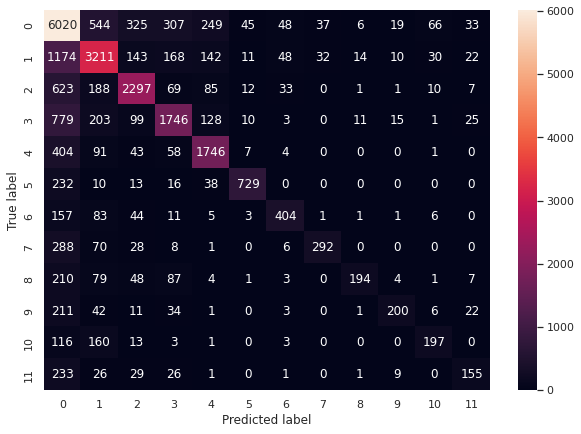

In [ ]:
# LOGISTIC REGRESSION
lr = LogisticRegression(multi_class='ovr')
lr.fit(x_train_tfidf, y_train)
predictions_lr = lr.predict(tfidf.transform(X_val))
predictions_train = lr.predict(tfidf.transform(X_train))

results_lr = modelEvaluation(predictions_lr, y_val, "logistic Regression")

			RandomForestClassifier

Accuracy on validation set: 0.6475
Precision on validation set: 0.8447
Recall on validation set: 0.4800
F1_Score on validation set: 0.5667

Classification report : 
                 precision    recall  f1-score   support

        Others       0.51      0.87      0.64      7699
         Blend       0.68      0.65      0.66      5005
         Pinot       0.85      0.60      0.70      3326
     Sauvignon       0.85      0.48      0.61      3020
    Chardonnay       0.79      0.69      0.74      2354
      Riesling       0.96      0.64      0.77      1038
          Rose       0.79      0.49      0.61       716
    Sangiovese       0.98      0.31      0.47       693
        Merlot       0.98      0.26      0.41       638
        Malbec       0.97      0.35      0.52       531
Portuguese Red       0.87      0.25      0.39       493
   Tempranillo       0.90      0.16      0.27       481

      accuracy                           0.65     25994
     macro avg       

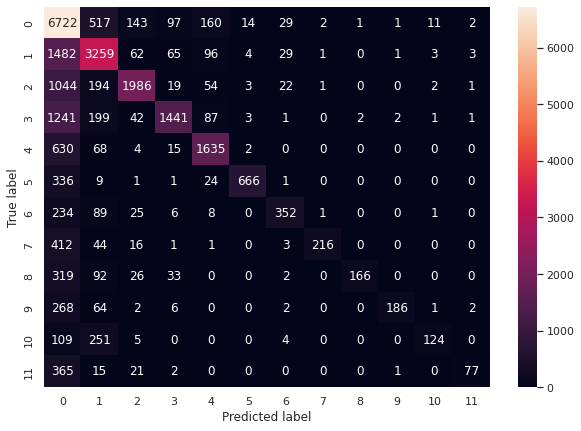

In [ ]:
# RANDOM FOREST MODEL
rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
predictions = rf.predict(tfidf.transform(X_val))
results_rf = modelEvaluation(predictions, y_val, "RandomForestClassifier")

			XGBClassifier

Accuracy on validation set: 0.5882
Precision on validation set: 0.7550
Recall on validation set: 0.4634
F1_Score on validation set: 0.5504

Classification report : 
                 precision    recall  f1-score   support

        Others       0.45      0.87      0.59      7699
         Blend       0.70      0.52      0.59      5005
         Pinot       0.83      0.48      0.61      3326
     Sauvignon       0.80      0.41      0.54      3020
    Chardonnay       0.83      0.51      0.63      2354
      Riesling       0.96      0.57      0.72      1038
          Rose       0.71      0.52      0.60       716
    Sangiovese       0.77      0.41      0.53       693
        Merlot       0.79      0.36      0.49       638
        Malbec       0.89      0.37      0.52       531
Portuguese Red       0.63      0.28      0.39       493
   Tempranillo       0.69      0.26      0.38       481

      accuracy                           0.59     25994
     macro avg       0.75     

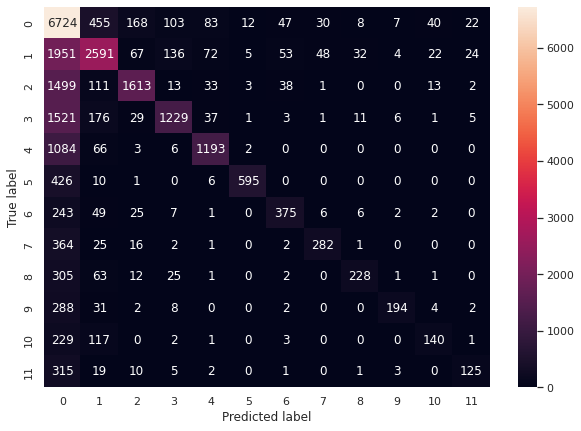

In [ ]:
# XGBOOST MODEL
xgb = XGBClassifier()
xgb.fit(x_train_tfidf, y_train)
predictions = xgb.predict(tfidf.transform(X_val))
results_xgb = modelEvaluation(predictions, y_val, "XGBClassifier")

# **Models Evaluation**

In [ ]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'LogisticRegression (TF-IDF)' : results_lr,
    'XGBoost (TF-IDF)' : results_xgb,
    'Random Forest (TF-IDF)' : results_rf,

}
metrics_df = pd.DataFrame(dic)

metrics_df1 = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df1.T, headers = 'keys', tablefmt = 'psql'))

+-----------------------------+------------+-------------+----------+------------+
|                             |   accuracy |   precision |   recall |   f1-score |
|-----------------------------+------------+-------------+----------+------------|
| LogisticRegression (TF-IDF) |   0.661345 |    0.721068 | 0.543703 |   0.602493 |
| XGBoost (TF-IDF)            |   0.588174 |    0.754979 | 0.463351 |   0.550382 |
| Random Forest (TF-IDF)      |   0.647457 |    0.844718 | 0.480007 |   0.566715 |
+-----------------------------+------------+-------------+----------+------------+


# **Deep Learning**

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
word2vec_data = [tokenize_list_words]
# word2vec model
model1 = gensim.models.Word2Vec(word2vec_data, min_count = 1,size  = 100, window = 5, sg=0) 

In [ ]:
# checking the length of vocablary
vocab_len = len(model1.wv.vocab)
vocab_len

21676

In [ ]:
# lets try to check the similar words with percentage 
model1.wv.most_similar('wine')

[('aroma', 0.9966933727264404),
 ('drink', 0.9963184595108032),
 ('flavor', 0.9962829947471619),
 ('finish', 0.9961759448051453),
 ('offer', 0.9961726069450378),
 ('fruit', 0.9960043430328369),
 ('note', 0.9958168268203735),
 ('well', 0.9956953525543213),
 ('palat', 0.9956725835800171),
 ('rich', 0.9952479004859924)]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df.columns

Index(['description', 'variety', 'description_len', 'cleaned_description',
       'variety_label'],
      dtype='object')

In [ ]:
# getting the sentences vector and sentiment values
df1 = df['cleaned_description'].values
label = df['variety_label'].values

In [ ]:
# Tokenize the data
max_features = 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df1)

In [ ]:
# Encode the data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(df1)

In [ ]:
# Get our training data word index
word_index = tokenizer.word_index
len(word_index)

21676

In [ ]:
# Get max sequence length
maxlen = max([len(x) for x in train_sequences])
maxlen

73

In [ ]:
# Pad the training sequences
train_padded = pad_sequences(train_sequences, maxlen=maxlen)

In [ ]:
print("Shape of Sentences :", train_padded.shape)
print("Shape of Sentiment :", label.shape)

Shape of Sentences : (129970, 73)
Shape of Sentiment : (129970,)


In [ ]:
print("\nPadded sequences:\n", train_padded)


Padded sequences:
 [[   0    0    0 ...  111  298    6]
 [   0    0    0 ...  245  566  352]
 [   0    0    0 ...  677  601  308]
 ...
 [   0    0    0 ... 1041   54    8]
 [   0    0    0 ...  164   33    8]
 [   0    0    0 ...   61  228    8]]


In [ ]:
#split data into training, validation and testing set
X_train, X_temp, y_train, y_temp = train_test_split(train_padded, label, test_size=0.4, random_state=0, stratify=label)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

In [ ]:
batch_size = 128
steps_per_epoch = int( np.ceil(X_train.shape[0] / batch_size) )
steps_per_epoch

610

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Get max training sequence length
maxlen = max([len(x) for x in X_train])
maxlen

73

In [ ]:
[X_train.shape,X_val.shape]

[(77982, 73), (25994, 73)]

In [ ]:
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values
Y_val = pd.get_dummies(y_val).values

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
max_features = 3000
embed_dim = 128
lstm_out = 256

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = maxlen))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(12,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 73, 128)           384000    
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 73, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 256)               394240    
                                                                 
 dense_8 (Dense)             (None, 12)                3084      
                                                                 
Total params: 781,324
Trainable params: 781,324
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size,validation_data=(X_val, Y_val),
          steps_per_epoch=steps_per_epoch)

Epoch 1/10
610/610 [==============================] - 212s 343ms/step - loss: 1.5375 - accuracy: 0.4654 - val_loss: 1.1217 - val_accuracy: 0.6114
Epoch 2/10
610/610 [==============================] - 209s 342ms/step - loss: 1.0676 - accuracy: 0.6313 - val_loss: 0.9783 - val_accuracy: 0.6622
Epoch 3/10
610/610 [==============================] - 209s 343ms/step - loss: 0.9672 - accuracy: 0.6625 - val_loss: 0.9496 - val_accuracy: 0.6689
Epoch 4/10
610/610 [==============================] - 208s 342ms/step - loss: 0.9203 - accuracy: 0.6757 - val_loss: 0.9404 - val_accuracy: 0.6668
Epoch 5/10
610/610 [==============================] - 226s 371ms/step - loss: 0.8895 - accuracy: 0.6851 - val_loss: 0.9139 - val_accuracy: 0.6794
Epoch 6/10
610/610 [==============================] - 211s 346ms/step - loss: 0.8624 - accuracy: 0.6946 - val_loss: 0.9122 - val_accuracy: 0.6770
Epoch 7/10
610/610 [==============================] - 208s 341ms/step - loss: 0.8422 - accuracy: 0.6997 - val_loss: 0.9034 -

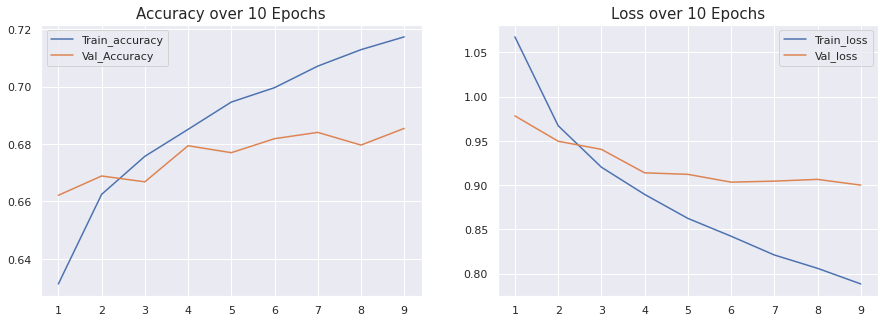

In [ ]:
#Plot the accuracy and loss graphs

import matplotlib.pyplot as plt

def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_accuracy')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_Accuracy')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(history, 10)

In [ ]:
# lets try to evaluate the model on testing data
test_eval = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.8991066813468933
Test accuracy: 0.6853119730949402


In [ ]:
# lets try to predict the classes
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)

dic = {'Others':0,'Blend':1,'Pinot':2,'Sauvignon':3,'Chardonnay':4,'Riesling':5,'Rose':6,
       'Sangiovese':7,'Merlot':8,'Malbec':9,'Portuguese Red':10,'Tempranillo':11}
       
target_names = list(dic.keys())
print ("\nClassification report : \n", classification_report(y_test, y_pred, target_names=target_names))


Classification report : 
                 precision    recall  f1-score   support

        Others       0.54      0.82      0.65      7698
         Blend       0.77      0.60      0.68      5006
         Pinot       0.80      0.67      0.73      3326
     Sauvignon       0.77      0.58      0.66      3021
    Chardonnay       0.77      0.78      0.77      2353
      Riesling       0.87      0.74      0.80      1037
          Rose       0.75      0.73      0.74       716
    Sangiovese       0.75      0.51      0.61       692
        Merlot       0.89      0.35      0.50       639
        Malbec       0.89      0.36      0.51       531
Portuguese Red       0.77      0.46      0.58       493
   Tempranillo       0.84      0.31      0.45       482

      accuracy                           0.67     25994
     macro avg       0.78      0.57      0.64     25994
  weighted avg       0.72      0.67      0.67     25994



			Deep Learning

Accuracy on validation set: 0.6749
Precision on validation set: 0.7838
Recall on validation set: 0.5748
F1_Score on validation set: 0.6394

Classification report : 
                 precision    recall  f1-score   support

        Others       0.54      0.82      0.65      7698
         Blend       0.77      0.60      0.68      5006
         Pinot       0.80      0.67      0.73      3326
     Sauvignon       0.77      0.58      0.66      3021
    Chardonnay       0.77      0.78      0.77      2353
      Riesling       0.87      0.74      0.80      1037
          Rose       0.75      0.73      0.74       716
    Sangiovese       0.75      0.51      0.61       692
        Merlot       0.89      0.35      0.50       639
        Malbec       0.89      0.36      0.51       531
Portuguese Red       0.77      0.46      0.58       493
   Tempranillo       0.84      0.31      0.45       482

      accuracy                           0.67     25994
     macro avg       0.78     

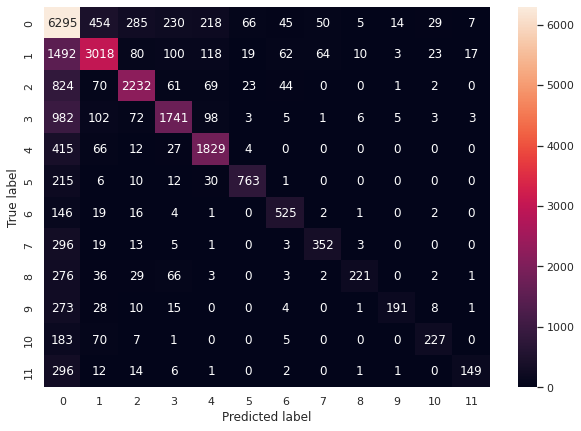

[0.6748865122720628, 0.783834148153478, 0.5748430056202253, 0.6394025682785719]

In [ ]:
modelEvaluation(y_pred, y_test, 'Deep Learning')

In [ ]:

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

# Creating the Bag of Words model
word2count = {}
for data in ['My Name is Muhammad Talha Talha']:
    words = word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
word2count

{'My': 1, 'Name': 1, 'is': 1, 'Muhammad': 1, 'Talha': 2}